Dataset Length: 60000
Features shape: torch.Size([1, 28, 28])
Label of index 0: 5
DataFrame head:
    label
0      5
1      0
2      4
3      1
4      9


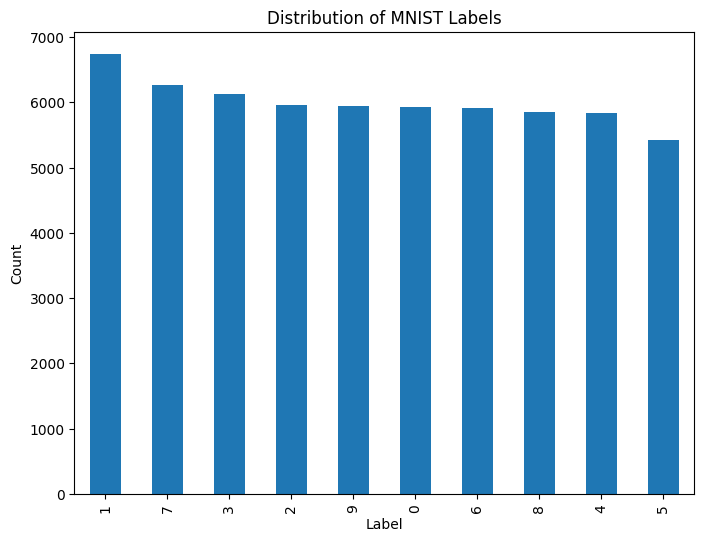

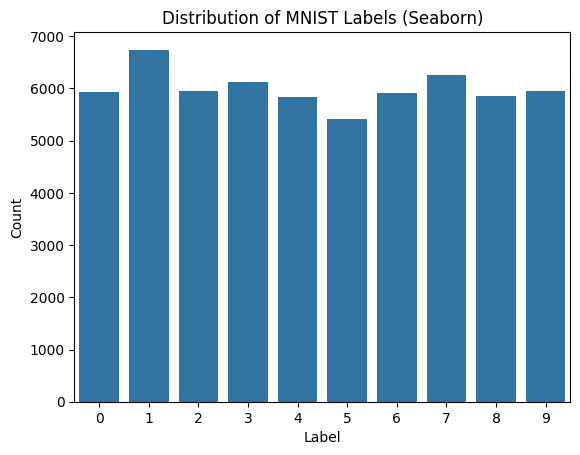

Training dataset size: 48000
Validation dataset size: 12000


In [3]:
"""
Question:
how can we look at our data?- how many of each label, etc. histograms? 
Does this Autodiff.ipynb use a random seed? 
can you use torch utils to do any other kind of splits?
"""
import torch
from torchvision import datasets, transforms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from torch.utils.data import random_split

# Load the MNIST dataset
transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)

# Print dataset details
print("Dataset Length:", len(dataset))
example, label = dataset[0]
print("Features shape:", example.shape)
print("Label of index 0:", label)

# Convert labels to DataFrame
df = pd.DataFrame(dataset.targets.numpy(), columns=['label'])
print("DataFrame head:\n", df.head())

# Plot label distribution
df['label'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of MNIST Labels')
plt.show()

sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of MNIST Labels (Seaborn)')
plt.show()

# Split dataset into training and validation sets
def create_data_splits(dataset, train_ratio=0.8):
    dataset_size = len(dataset)
    train_size = int(train_ratio * dataset_size)
    val_size = dataset_size - train_size
    return random_split(dataset, [train_size, val_size])

train_dataset, val_dataset = create_data_splits(dataset)
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
